In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive, files
#!pip install opendatasets
#import opendatasets as od
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
#files.upload()

In [150]:
!pip install kaggle -q
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [85]:
!kaggle datasets download ajaxianazarenka/premier-league

premier-league.zip: Skipping, found more recently modified local copy (use --force to force download)


In [151]:
! unzip premier-league.zip

Archive:  premier-league.zip
caution: filename not matched:  -q


# Raw

In [146]:
prem_file = pd.read_csv('/content/PremierLeague.csv')

In [147]:
prem_file_filtered = prem_file

In [148]:
prem_file_filtered

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,1993-1994,14/08/93,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-1994,14/08/93,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-1994,14/08/93,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-1994,14/08/93,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-1994,14/08/93,NaN,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,2023-2024,13/03/24,19:30:00,Bournemouth,Luton,4,3,H,0.0,3.0,...,1.55,4.98,6.40,1.50,4.77,6.00,1.49,2.82,1.47,2.71
11679,2023-2024,16/03/24,15:00:00,Burnley,Brentford,2,1,H,1.0,0.0,...,3.41,3.80,2.21,3.27,3.66,2.16,1.80,2.17,1.75,2.10
11680,2023-2024,16/03/24,15:00:00,Luton,Nott'm Forest,1,1,D,0.0,1.0,...,2.95,3.80,2.47,2.81,3.63,2.42,1.73,2.31,1.68,2.22
11681,2023-2024,16/03/24,17:30:00,Fulham,Tottenham,3,0,H,1.0,0.0,...,3.54,4.16,2.08,3.40,3.93,2.01,1.52,2.72,1.49,2.62


In [89]:
villa_stats_file = prem_file_filtered.loc[(prem_file_filtered["HomeTeam"] == "Aston Villa") | (prem_file_filtered["AwayTeam"] == "Aston Villa")]

In [90]:
villa_stats_file = villa_stats_file[["Season", "HomeTeam", "AwayTeam", "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals", "FullTimeResult"]]

In [91]:
villa_stats_file["VillaWon"] = ((villa_stats_file["HomeTeam"] == "Aston Villa") & (villa_stats_file["FullTimeResult"] == "H")) | ((villa_stats_file["AwayTeam"] == "Aston Villa") & (villa_stats_file["FullTimeResult"] == "A"))
villa_stats_file["VillaTied"] = (villa_stats_file["FullTimeResult"] == "D")
villa_stats_file["VillaLost"] = ((villa_stats_file["HomeTeam"] == "Aston Villa") & (villa_stats_file["FullTimeResult"] == "A")) | ((villa_stats_file["AwayTeam"] == "Aston Villa") & (villa_stats_file["FullTimeResult"] == "H"))

In [92]:
villa_stats_file

,Season,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,VillaWon,VillaTied,VillaLost
1,1993-1994,Aston Villa,QPR,4,1,H,True,False,False
20,1993-1994,Sheffield Weds,Aston Villa,0,0,D,False,True,False
31,1993-1994,Wimbledon,Aston Villa,2,2,D,False,True,False
33,1993-1994,Aston Villa,Man United,1,2,A,False,False,True
46,1993-1994,Aston Villa,Tottenham,1,0,H,True,False,False
...,...,...,...,...,...,...,...,...,...
11640,2023-2024,Fulham,Aston Villa,1,2,A,True,False,False
11650,2023-2024,Aston Villa,Nott'm Forest,4,2,H,True,False,False
11664,2023-2024,Luton,Aston Villa,2,3,A,True,False,False
11673,2023-2024,Aston Villa,Tottenham,0,4,A,False,False,True


In [93]:
def mapear_resultados(fila):
  if fila["VillaWon"]:
    return "Won"
  if fila["VillaTied"]:
    return "Tied"
  if fila["VillaLost"]:
    return "Lost"
villa_stats_file["FinalResult"] = villa_stats_file.apply(mapear_resultados, axis = 1)

In [94]:
villa_stats_file = villa_stats_file.drop(["VillaWon", "VillaTied", "VillaLost", "FullTimeResult"], axis = 1)

In [95]:
villa_stats_file

,Season,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FinalResult
1,1993-1994,Aston Villa,QPR,4,1,Won
20,1993-1994,Sheffield Weds,Aston Villa,0,0,Tied
31,1993-1994,Wimbledon,Aston Villa,2,2,Tied
33,1993-1994,Aston Villa,Man United,1,2,Lost
46,1993-1994,Aston Villa,Tottenham,1,0,Won
...,...,...,...,...,...,...
11640,2023-2024,Fulham,Aston Villa,1,2,Won
11650,2023-2024,Aston Villa,Nott'm Forest,4,2,Won
11664,2023-2024,Luton,Aston Villa,2,3,Won
11673,2023-2024,Aston Villa,Tottenham,0,4,Lost


In [96]:
match_stats_by_season = villa_stats_file.groupby(["Season","FinalResult"]).agg({"FinalResult":["count"]})

In [97]:
match_stats_by_season_unstacked = match_stats_by_season.unstack()
match_stats_by_season_unstacked = match_stats_by_season_unstacked.reset_index()
match_stats_by_season_unstacked.columns = ["Season", "Lost", "Tied", "Won"]

In [98]:
match_stats_by_season_unstacked["winRate"] = match_stats_by_season_unstacked["Won"]*100 / (match_stats_by_season_unstacked["Lost"] + match_stats_by_season_unstacked["Tied"] + match_stats_by_season_unstacked["Won"])

In [152]:
match_stats_by_season_unstacked.nlargest(5, "winRate")

,Season,Lost,Tied,Won,winRate
27,2023-2024,7,5,17,58.620690
2,1995-1996,11,9,18,47.368421
26,2022-2023,13,7,18,47.368421
3,1996-1997,11,10,17,44.736842
4,1997-1998,15,6,17,44.736842


# Win rate by season

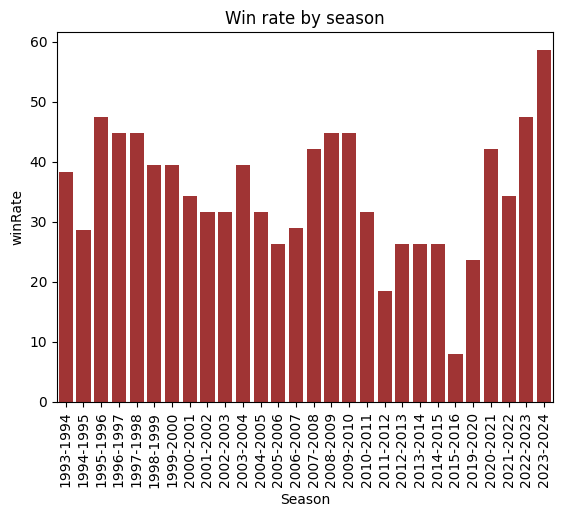

In [100]:
win_r_by_season_plot = sns.barplot(data = match_stats_by_season_unstacked, x = "Season", y = "winRate", color = "FireBrick")

plt.xticks(rotation=90)
plt.title("Win rate by season")
plt.show()

In [101]:
match_stats_by_season = match_stats_by_season.reset_index()

In [102]:
match_stats_by_season.columns = ["Season", "FinalResult", "Total"]

In [103]:
match_stats_by_season[["Season1","Season2"]] = match_stats_by_season["Season"].str.split("-", expand = True)
match_stats_by_season["Season1"] = match_stats_by_season["Season1"].astype(int)

In [104]:
match_stats_by_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       84 non-null     object
 1   FinalResult  84 non-null     object
 2   Total        84 non-null     int64 
 3   Season1      84 non-null     int64 
 4   Season2      84 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.4+ KB


In [105]:
match_stats_by_season_2019 = match_stats_by_season.loc[match_stats_by_season["Season1"] >= 2019]

In [106]:
match_stats_by_season_2019.head()

,Season,FinalResult,Total,Season1,Season2
69,2019-2020,Lost,21,2019,2020
70,2019-2020,Tied,8,2019,2020
71,2019-2020,Won,9,2019,2020
72,2020-2021,Lost,15,2020,2021
73,2020-2021,Tied,7,2020,2021


# Season result

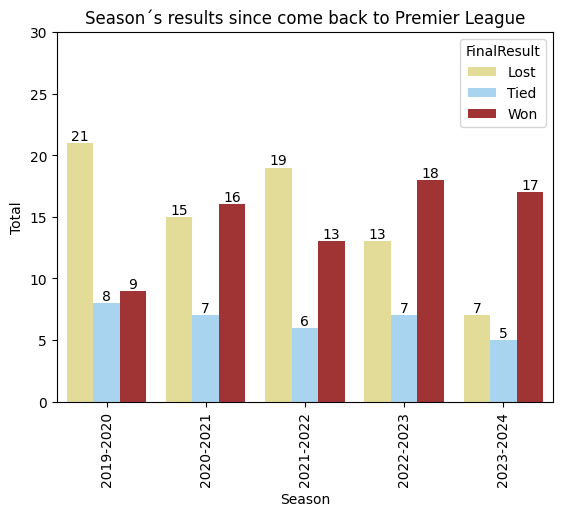

In [107]:
ax = sns.barplot(data = match_stats_by_season_2019, x = "Season", y = "Total", hue = "FinalResult", palette = {"Won":"FireBrick", "Tied":"#9dd7fb", "Lost":"Khaki"})
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.ylim(0, 30)
plt.title("Season´s results since come back to Premier League")
plt.xticks(rotation=90)
plt.show()

In [108]:
matches_by_season = villa_stats_file.groupby("Season").agg({"Season":["count"]})

In [109]:
def villa_goals_scored_sum(fila):
  if fila["HomeTeam"] == "Aston Villa":
    return fila["FullTimeHomeTeamGoals"]
  if fila["AwayTeam"] == "Aston Villa":
    return fila["FullTimeAwayTeamGoals"]
villa_stats_file["VillaGoals"] = villa_stats_file.apply(villa_goals_scored_sum, axis = 1)

def villa_goals_received_sum(fila):
  if fila["HomeTeam"] != "Aston Villa":
    return fila["FullTimeHomeTeamGoals"]
  if fila["AwayTeam"] != "Aston Villa":
    return fila["FullTimeAwayTeamGoals"]
villa_stats_file["OponentGoals"] = villa_stats_file.apply(villa_goals_received_sum, axis = 1)

# Goal stats in premier league

In [110]:
goals_scored_received = villa_stats_file.groupby("Season").agg({"VillaGoals":["sum"], "OponentGoals":["sum"]})
#goals_scored_received = goals_scored_received.reset_index()

In [111]:
goals_scored_received = goals_scored_received.unstack().reset_index()

In [112]:
goals_scored_received.columns = ["type", "func", "Season", "Amount"]
goals_scored_received["type"] = goals_scored_received["type"].map({"VillaGoals":"Scored", "OponentGoals":"Received"})

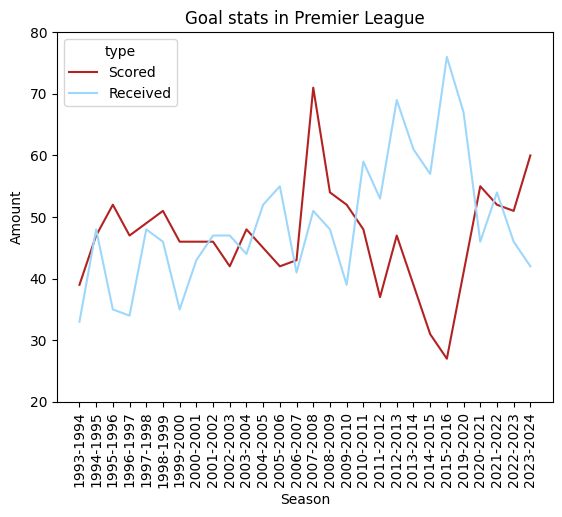

In [113]:
sns.lineplot(data = goals_scored_received, x = "Season", y = "Amount", hue = "type", palette = {"Scored":"FireBrick", "Received":"#9dd7fb"})
plt.ylim(20, 80)
plt.xticks(rotation=90)
plt.title("Goal stats in Premier League")
plt.show()

In [114]:
every_team_home_goal = prem_file_filtered.groupby(["Season", "HomeTeam"]).agg({"FullTimeHomeTeamGoals":["sum"]})
every_team_home_goal = every_team_home_goal.reset_index()
every_team_home_goal.columns = ["Season", "HomeTeam", "Total"]

In [115]:
every_team_away_goal = prem_file_filtered.groupby(["Season", "AwayTeam"]).agg({"FullTimeAwayTeamGoals":["sum"]})
every_team_away_goal = every_team_away_goal.reset_index()
every_team_away_goal.columns = ["Season", "AwayTeam", "Total"]

In [116]:
matches_by_season = matches_by_season.reset_index()
matches_by_season.columns = ["Season", "Games"]

In [117]:
every_team_away_goal["GoalsSum"] = every_team_away_goal["Total"] + every_team_home_goal["Total"]
every_team_away_goal = every_team_away_goal.merge(matches_by_season, on= "Season", how = "inner")

In [118]:
every_team_away_goal["GoalPerMatch"] = (every_team_away_goal["GoalsSum"] / every_team_away_goal["Games"])

In [119]:
sorted_goal_per_match = every_team_away_goal.sort_values("GoalPerMatch", ascending = False)
sorted_goal_per_match = sorted_goal_per_match.reset_index(drop = True)
sorted_goal_per_match = sorted_goal_per_match.rename(columns ={"AwayTeam":"Team"})

Historical postion on best goal per match stat in premier league

In [120]:
sorted_goal_per_match.loc[sorted_goal_per_match["Team"] == "Aston Villa"].head(4)

,Season,Team,Total,GoalsSum,Games,GoalPerMatch
28,2023-2024,Aston Villa,25,60,29,2.068966
65,2007-2008,Aston Villa,37,71,38,1.868421
179,2020-2021,Aston Villa,26,55,38,1.447368
192,2008-2009,Aston Villa,27,54,38,1.421053


In [121]:
home_goals = prem_file_filtered.groupby(["HomeTeam", "AwayTeam"]).agg({"FullTimeHomeTeamGoals":["sum"],"FullTimeAwayTeamGoals":["sum"] })
home_goals = home_goals.reset_index()
home_goals.columns = ["HomeTeam", "AwayTeam", "HomeTeamGoals", "AwayTeamGoals"]

In [122]:
away_goals = prem_file_filtered.groupby(["AwayTeam", "HomeTeam"]).agg({"FullTimeAwayTeamGoals":["sum"],"FullTimeHomeTeamGoals":["sum"] })
away_goals = away_goals.reset_index()
away_goals.columns = ["AwayTeam", "HomeTeam", "AwayTeamGoals", "HomeTeamGoals"]

In [123]:
home_goals_villa = home_goals.loc[home_goals["HomeTeam"] == "Aston Villa"]
home_goals_villa = home_goals_villa.reset_index(drop = True)

In [124]:
away_goals_villa = away_goals.loc[away_goals["AwayTeam"] == "Aston Villa"]
away_goals_villa = away_goals_villa.reset_index(drop = True)

Equipos a los que mas goles le hizo de local

In [125]:
home_goals_villa.nlargest(5,"HomeTeamGoals")

,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals
17,Aston Villa,Everton,48,26
45,Aston Villa,West Ham,33,26
28,Aston Villa,Newcastle,32,25
42,Aston Villa,Tottenham,31,41
18,Aston Villa,Fulham,27,10


Equipos a  los que mas goles les hizo de visitante

In [126]:
away_goals_villa.nlargest(5,"AwayTeamGoals")

,AwayTeam,HomeTeam,AwayTeamGoals,HomeTeamGoals
17,Aston Villa,Everton,35,39
42,Aston Villa,Tottenham,32,45
13,Aston Villa,Chelsea,28,53
23,Aston Villa,Liverpool,28,55
27,Aston Villa,Middlesbrough,28,14


In [127]:
home_goals_villa_copy = home_goals_villa.copy()

In [128]:
home_goals_villa_copy["HomeTeamAway"] = away_goals_villa["AwayTeamGoals"]
home_goals_villa_copy["AwayTeamHome"] = away_goals_villa["HomeTeamGoals"]

In [129]:
home_goals_villa_copy["VillaTotGoals"] = home_goals_villa_copy['HomeTeamGoals'] + home_goals_villa_copy['HomeTeamAway']
home_goals_villa_copy["VillaTotGoalsReceived"] = home_goals_villa_copy['AwayTeamGoals'] + home_goals_villa_copy['AwayTeamHome']


Equipos a los que mas goles les hizo en general

In [130]:
equipos_mas_goles_hechos = home_goals_villa_copy.nlargest(5,"VillaTotGoals")

Text(0.5, 1.0, 'More goals scored against')

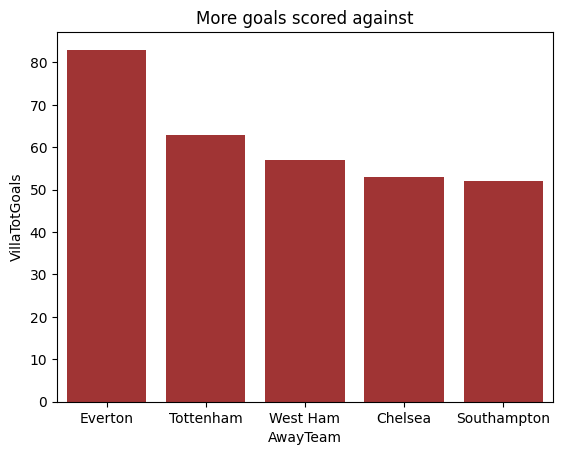

In [131]:
sns.barplot(data = equipos_mas_goles_hechos, x = "AwayTeam", y = "VillaTotGoals", color = "FireBrick")
plt.title("More goals scored against")

In [132]:
equipos_mas_goles_recibidos = home_goals_villa_copy.nlargest(5,"VillaTotGoalsReceived")

Text(0.5, 1.0, 'More goals received against')

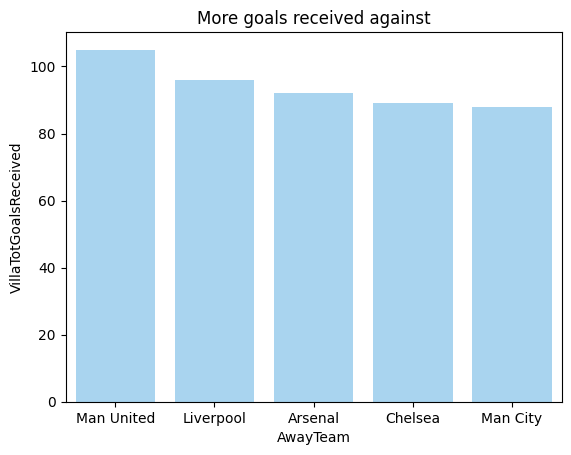

In [133]:
sns.barplot(data = equipos_mas_goles_recibidos, x = "AwayTeam", y = "VillaTotGoalsReceived", color = "#9dd7fb")
plt.title("More goals received against")

In [134]:
home_results = prem_file_filtered.groupby(["HomeTeam", "AwayTeam", "FullTimeResult"]).agg({"FullTimeResult":["count"] })
home_results = home_results.reset_index()
home_results.columns = ["HomeTeam", "AwayTeam", "FullTimeResult", "Total"]

A los que mas veces les gano de local

In [135]:
villa_home_results = home_results.loc[home_results["HomeTeam"] == "Aston Villa"]

In [136]:
villa_home_wins = villa_home_results.loc[villa_home_results['FullTimeResult'] == "H"]
villa_home_lost = villa_home_results.loc[villa_home_results['FullTimeResult'] == "A"]

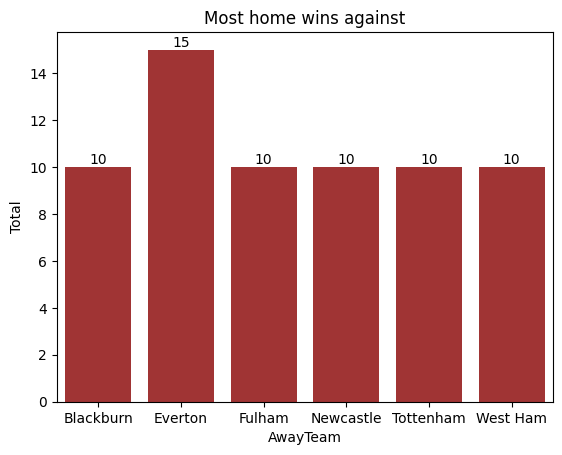

In [137]:
strong_at_home_plot = sns.barplot(data = villa_home_wins.loc[villa_home_wins["Total"] >= villa_home_wins["Total"].max() - 5], x = "AwayTeam", y = "Total", color ="FireBrick")
strong_at_home_plot.bar_label(strong_at_home_plot.containers[0], fontsize=10)
plt.title("Most home wins against")
plt.show()

Con los que mas perdio de local

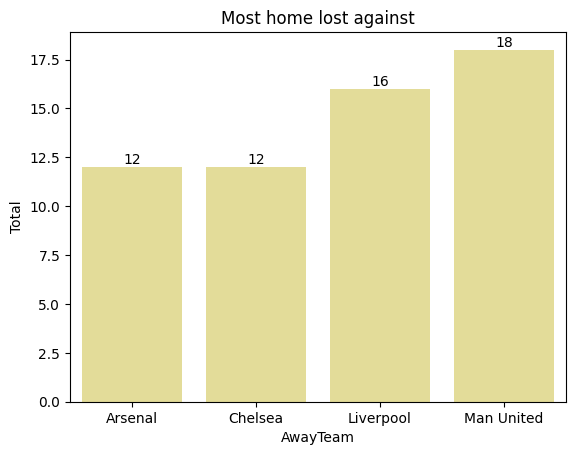

In [138]:
week_at_home_plot = sns.barplot(data = villa_home_lost.loc[villa_home_lost["Total"] >= villa_home_lost["Total"].max() - 6], x = "AwayTeam", y = "Total", color = "Khaki")
week_at_home_plot.bar_label(week_at_home_plot.containers[0], fontsize=10)
plt.title("Most home lost against")
plt.show()

A los que mas veces les gano de visitante

In [139]:
villa_away_results = home_results.loc[home_results["AwayTeam"] == "Aston Villa"]

In [140]:
villa_away_wins = villa_away_results.loc[villa_away_results['FullTimeResult'] == "A"]
villa_away_lost = villa_away_results.loc[villa_away_results['FullTimeResult'] == "H"]

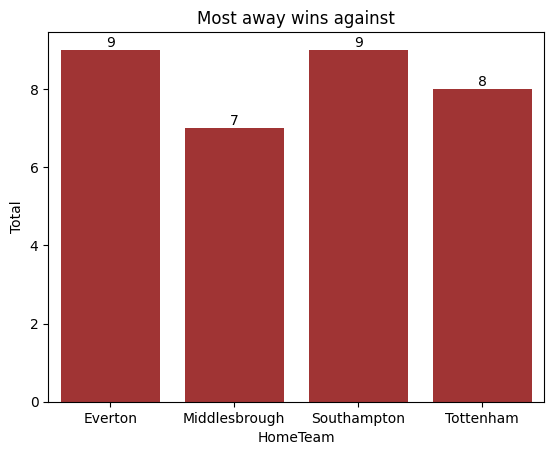

In [141]:
strog_at_away_plot = sns.barplot(data = villa_away_wins.loc[villa_away_wins["Total"] >= villa_away_wins["Total"].max() - 2], x = "HomeTeam", y = "Total", color = "FireBrick")
strog_at_away_plot.bar_label(strog_at_away_plot.containers[0], fontsize=10)
plt.title("Most away wins against")
plt.show()

Con los que mas perdio de visitante

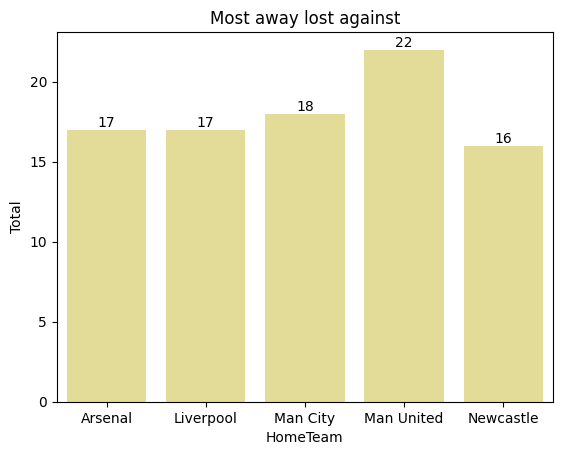

In [142]:
week_at_away_plot = sns.barplot(data = villa_away_lost.loc[villa_away_lost["Total"] >= villa_away_lost["Total"].max() - 6], x = "HomeTeam", y = "Total", color = "Khaki")
week_at_away_plot.bar_label(week_at_away_plot.containers[0], fontsize=10)
plt.title("Most away lost against")
plt.show()